In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Does the fuel type of the fuel type influence price of car?

In [3]:
df_price = df[df['price'] != '?']
price_gas = df_price.price[df['fuel-type'] == 'gas']
price_diesel = df_price.price[df['fuel-type'] == 'diesel']

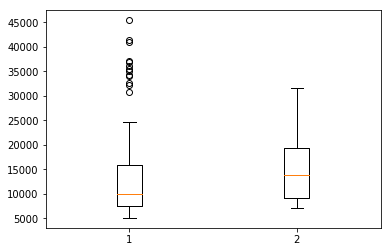

In [4]:
plt.boxplot([price_gas.astype(int), price_diesel.astype(int)])
plt.show()

Assume:
 * `H0` is that the two samples average are identical.
 * `Ha` is that the two samples average are not identical.

If:
 * p_value `larger` than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores.
 * p_value `smaller` than 0.05 or 0.1, then we can reject the null hypothesis of identical average scores.

In [54]:
statistic, p_value = sp.stats.ttest_ind(price_gas.astype(int), price_diesel.astype(int))

In [55]:
print(statistic)
print(p_value)

-1.5658926002375724
0.1189625443809135


In [6]:
price_diesel.shape

(20,)

In [5]:
price_gas.shape

(181,)

In [7]:
price_diesel.mean()

5.3975917212776144e+91

In [11]:
price_gas.astype(int).mean(skipna=True)

12916.408839779006

In [13]:
price_gas.describe()

count      181
unique     168
top       6229
freq         2
Name: price, dtype: object

p_value `larger` than 5% then we **can not** reject the null hypothesis.

Does number of doors influence the price of car?

In [14]:
df_price = df_price[df_price['num-of-doors'] != '?']

In [15]:
price_four_doors = df_price.price[df['num-of-doors'] == 'four']
price_two_doors = df_price.price[df['num-of-doors'] == 'two']

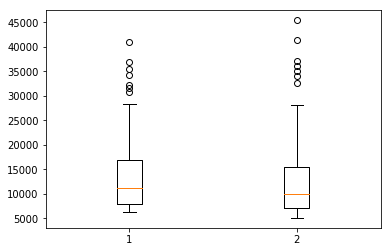

In [16]:
plt.boxplot([price_four_doors.astype(int), price_two_doors.astype(int)])
plt.show()

In [18]:
price_two_doors.shape

(86,)

In [17]:
price_four_doors.shape

(113,)

In [51]:
statistic, p_value = sp.stats.ttest_ind(price_four_doors.astype(int), price_two_doors.astype(int))

In [53]:
print(statistic)
print(p_value)

0.6538188733550477
0.5139909636776429


p_value `larger` than 5% then we **can not** reject the null hypothesis.

In [19]:
mpg_gas = df['city-mpg'][df['fuel-type'] == 'gas']
mpg_diesel = df['city-mpg'][df['fuel-type'] == 'diesel']

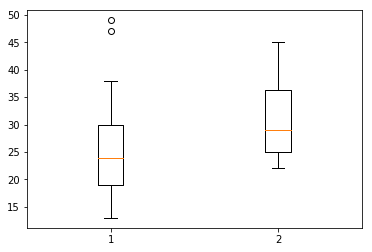

In [20]:
plt.boxplot([mpg_gas, mpg_diesel])
plt.show()

In [21]:
mpg_diesel.shape

(20,)

In [22]:
mpg_gas.shape

(185,)

In [23]:
statistic, p_value = sp.stats.ttest_ind(mpg_gas, mpg_diesel)

In [24]:
print(statistic)
print(p_value)

-3.772582345058656
0.00021196038081708785


p_value `smaller` than 5% then we **can** reject the null hypothesis.